In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import stats
import itertools
import matplotlib.pyplot as plt
import cloveFunctions as clv


In [ ]:
# generate clDEG (vulnerability vector) in CCLE breast cloves
exp = pd.read_pickle('data/breast_mrna_df.pickle')
cnv = pd.read_csv('data/breast_CCLE_DEL_calls.csv.gz', index_col=0, compression='gzip')
hits = pd.read_csv('data/breast_ttest_real_samp.tab.gz', sep='\t', index_col=0, compression='gzip')

cldeg_ccle = clv.vulnerability_vector_count(exp, cnv, hits)
# cldeg_ccle.to_csv('data/breast_het_clDEG_count.tab.gz', sep='\t', compression='gzip')
dep_breast = pd.read_csv('data/breast_Achilles_gene_dependency.csv.gz', compression='gzip', index_col=0)

corr = clv.correlate_df_cols(cldeg_ccle, dep_breast)
# corr_null = clv.correlate_df_cols(cldeg_ccle, dep_breast,perm=True)

corr_null['group']='null'
corr['group']='non-null'
corr_cat = pd.concat([corr_null, corr])
# corr_cat.to_csv('data/breast_clDEG_ccleVdemeter_cells.tab', sep='\t')

### comparing tcga to ccle
original implementation was in *ccle_results.ipynb*

### comparing cldeg to demeter (achillies)
original implementation was in *ccle_results.ipynb*

In [47]:
# # generate clDEG (vulnerability vector) in CCLE breast cloves
# exp = pd.read_pickle('data/breast_mrna_df.pickle')
# cnv = pd.read_csv('data/breast_CCLE_DEL_calls.csv.gz', index_col=0, compression='gzip')
# hits = pd.read_csv('data/breast_ttest_real_samp.tab.gz', sep='\t', index_col=0, compression='gzip')

# cldeg_ccle = clv.vulnerability_vector_count(exp, cnv, hits)
# # cldeg_ccle.to_csv('data/breast_het_clDEG_count.tab.gz', sep='\t', compression='gzip')
# cldeg_ccle = pd.read_csv('data/breast_het_clDEG_count.tab.gz', sep='\t', compression='gzip')
# dep_breast = pd.read_csv('data/breast_Achilles_gene_dependency.csv.gz', compression='gzip', index_col=0)

# corr = clv.correlate_df_cols(cldeg_ccle, dep_breast)
# # corr_null = clv.correlate_df_cols(cldeg_ccle, dep_breast,perm=True)

# corr_null['group']='null'
# corr['group']='non-null'
# corr_cat = pd.concat([corr_null, corr])
# # corr_cat.to_csv('data/breast_clDEG_ccleVdemeter_cells.tab', sep='\t')

In [6]:
corr_cat = pd.read_table('data/breast_clDEG_ccleVdemeter_cells.tab', index_col=0)
corr_null = corr_cat[corr_cat['group']=='null']
corr = corr_cat[corr_cat['group']=='non-null']

Ks_2sampResult(statistic=0.42307692307692307, pvalue=0.012812361957881577)


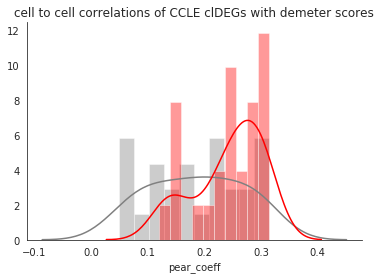

In [7]:
%matplotlib inline
sns.set_style("white")
sns.distplot(corr_cat[corr_cat['group']=='null']['pear_coeff'], color='gray',kde=True, norm_hist=True,bins=10)

sns.distplot(corr_cat[corr_cat['group']=='non-null']['pear_coeff'], color='red',kde=True,norm_hist=True,bins=10)
plt.title('cell to cell correlations of CCLE clDEGs with demeter scores')
sns.despine()

print(stats.ks_2samp(corr_null['pear_coeff'], corr['pear_coeff']))

In [8]:
cldeg_tcga = pd.read_csv('data/brca_het_clDEG_count.tab.gz', sep='\t', compression='gzip', index_col=0)

In [9]:
cldeg = cldeg_tcga
cldeg.min().min()
very_null = pd.DataFrame(np.random.randint(cldeg.min().min(),cldeg.max().max(),size=(cldeg.shape[0], cldeg.shape[1])), 
                         columns=cldeg.columns, index=cldeg.index)

corr = clv.correlate_df_cols(cldeg_tcga, dep_breast, comb=True)
corr_null = clv.correlate_df_cols(very_null, dep_breast,comb=True)


In [10]:
corr_cat = pd.read_csv('data/breast_clDEG_ccleVdemeter_cells.tab', sep='\t', index_col=0)

Ks_2sampResult(statistic=0.99278395150815413, pvalue=0.0)


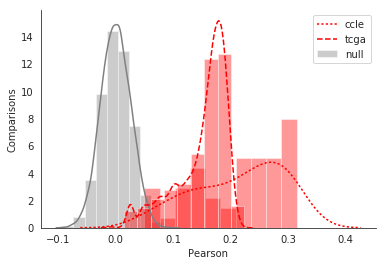

In [11]:
null_samp = corr_null.sample(corr.shape[0])
null_samp['pear_coeff']=null_samp['pear_coeff']*3.3
%matplotlib inline
sns.set_style("white")

sns.distplot(null_samp['pear_coeff'], color='gray',kde=True, norm_hist=True,bins=10, label='null')

sns.distplot(corr_cat['pear_coeff'].dropna(), color='red',kde=True,kde_kws={'linestyle':':', 'label':'ccle'},norm_hist=True,bins=10)

sns.distplot(corr['pear_coeff'].dropna(), color='red',kde=True,kde_kws={'linestyle':'--', 'label':'tcga'},norm_hist=True,bins=10)
plt.title('')
sns.despine()
plt.xlabel('Pearson')
plt.ylabel('Comparisons')
plt.legend()

print(stats.ks_2samp(corr_null['pear_coeff'], corr['pear_coeff']))

Ks_2sampResult(statistic=0.99278395150815413, pvalue=0.0)


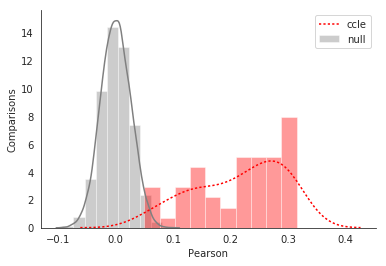

In [12]:
null_samp = corr_null.sample(corr.shape[0])
null_samp['pear_coeff']=null_samp['pear_coeff']*3.3
%matplotlib inline
sns.set_style("white")

sns.distplot(null_samp['pear_coeff'], color='gray',kde=True, norm_hist=True,bins=10, label='null')

sns.distplot(corr_cat['pear_coeff'].dropna(), color='red',kde=True,kde_kws={'linestyle':':', 'label':'ccle'},norm_hist=True,bins=10)

plt.title('')
sns.despine()
plt.xlabel('Pearson')
plt.ylabel('Comparisons')
plt.legend()

print(stats.ks_2samp(corr_null['pear_coeff'], corr['pear_coeff']))

Ks_2sampResult(statistic=0.99278395150815413, pvalue=0.0)


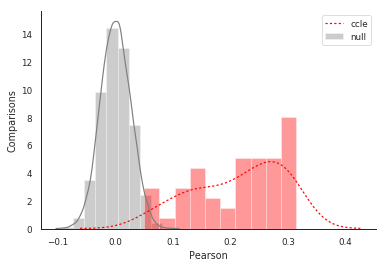

In [121]:
null_samp = corr_null.sample(corr.shape[0])
null_samp['pear_coeff']=null_samp['pear_coeff']*3.3
%matplotlib inline
sns.set_style("white")

sns.distplot(null_samp['pear_coeff'], color='gray',kde=True, norm_hist=True,bins=10, label='null')

sns.distplot(corr_cat['pear_coeff'].dropna(), color='red',kde=True,kde_kws={'linestyle':':', 'label':'ccle'},norm_hist=True,bins=10)
plt.title('')
sns.despine()
sns.set_context('paper')
plt.xlabel('Pearson')
plt.ylabel('Comparisons')
plt.legend()
# plt.savefig(filename='fig_ch4.3_ccle_demeter_pearson_hist.svg', format='svg')


print(stats.ks_2samp(corr_null['pear_coeff'], corr['pear_coeff']))

In [33]:
plt.savefig?

In [67]:
pd.merge(left=corr_null, right=corr, left_on=['sample','cell'], right_on=['sample','cell']).dropna().shape

(26182, 6)

Ks_2sampResult(statistic=0.053254437869822535, pvalue=0.067450291984364558)


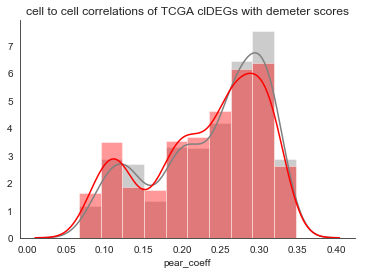

In [45]:
%matplotlib inline
sns.set_style("white")
sns.distplot(corr_null['pear_coeff'], color='gray',kde=True, norm_hist=True,bins=10)

sns.distplot(corr['pear_coeff'], color='red',kde=True,norm_hist=True,bins=10)
plt.title('cell to cell correlations of TCGA clDEGs with demeter scores')
sns.despine()
plt.legend()

print(stats.ks_2samp(corr_null['pear_coeff'], corr['pear_coeff']))

try it with kendall's tau b instead of pearson

In [7]:
cldeg_ccle = pd.read_csv('data/breast_het_clDEG_count.tab.gz', sep='\t', compression='gzip', index_col=0)
dep_breast = pd.read_csv('data/breast_Achilles_gene_dependency.csv.gz', compression='gzip', index_col=0)

# corr = clv.correlate_df_cols(cldeg_ccle, dep_breast)

In [8]:
cldeg_ccle.to_csv('data/breast_het_clDEG_count.csv.gz',compression='gzip')

In [9]:
clv.taub_corr_df_cols('data/breast_het_clDEG_count.csv.gz', 'data/breast_Achilles_gene_dependency.csv.gz')

,cldeg,demeter,tau_b,p_val,dist
0,AU565,AU565,0.203319,3.871090e-276,obs
1,BT549,BT549,0.123058,1.915869e-102,obs
2,CAL51,CAL51,0.102097,4.144876e-71,obs
3,CAMA1,CAMA1,0.185010,5.182901e-229,obs
4,DU4475,DU4475,0.159154,5.128091e-170,obs
5,EFM19,EFM19,0.182693,2.297944e-223,obs
6,HCC1143,HCC1143,0.196919,3.682282e-259,obs
7,HCC1395,HCC1395,0.183586,1.559620e-225,obs
8,HCC1419,HCC1419,0.202073,8.605073e-273,obs
9,HCC1428,HCC1428,0.184903,9.436411e-229,obs


In [3]:
def taub_corr_df_cols(df_1, df_2, comb=False, perm=False):
    df_1.dropna(inplace=True)
    df_2.dropna(inplace=True)
    idx_1, idx_2 = df_1.index, df_2.index
    if perm:
        df_1 = df_1.sample(frac=1)
        df_1.index=idx_1
    cldeg_depBreast_corr = [['cldeg','demeter','tau_b','p_val']]
    labels = idx_1.intersection(idx_2)
    df_1, df_2 = df_1.loc[labels], df_2.loc[labels]
    cldeg, dep_breast = df_1, df_2
   
    if comb:
#         completed = []
        for pair in itertools.product(cldeg.columns, dep_breast.columns):
            corr = stats.kendalltau(cldeg[pair[0]], dep_breast[pair[1]])
            cldeg_depBreast_corr.append([pair[0], pair[1], corr[0], corr[1]])
#             print(pair)
#             if (pair[0] != pair[1]) & (pair[::-1] not in completed):
#                     corr = stats.kendalltau(cldeg[pair[0]], dep_breast[pair[1]])
#                     cldeg_depBreast_corr.append([pair[0], pair[1], corr[0], corr[1]])
    else:
        for cell in cldeg.columns.intersection(dep_breast.columns):
            corr = stats.kendalltau(cldeg[cell], dep_breast[cell])
            cldeg_depBreast_corr.append([cell, cell, corr[0], corr[1]])

    cols = cldeg_depBreast_corr.pop(0)
    df_corr = pd.DataFrame(cldeg_depBreast_corr)
    df_corr.columns = cols
    if perm:
        df_corr['dist'] = 'null'
    else:
        df_corr['dist'] = 'obs'
    return df_corr

In [101]:
taub_obs = taub_corr_df_cols(cldeg_ccle, dep_breast)
taub_null = taub_corr_df_cols(cldeg_ccle, dep_breast, perm=True)
taub_cat = pd.concat([taub_obs,taub_null])

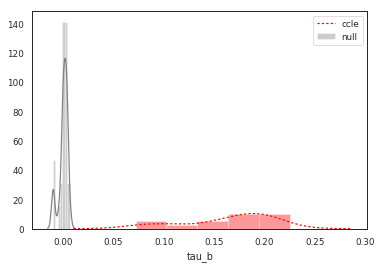

In [129]:
sns.distplot(taub_null['tau_b'], color='gray',kde=True, norm_hist=True, label='null')
sns.distplot(taub_obs['tau_b'], color='red',kde=True,norm_hist=True, kde_kws={'linestyle':':', 'label':'ccle'})
plt.legend()
plt.savefig('fig_ch4.3_ccle_demeter_taub_hist.svg')

In [123]:
taub_obs_a = taub_corr_df_cols(cldeg_ccle, dep_breast, comb=True)
taub_null_a = taub_corr_df_cols(cldeg_ccle, dep_breast, perm=True, comb=True)
taub_cat_a = pd.concat([taub_obs,taub_null])

In [110]:
taub_cat_a

,cldeg,demeter,tau_b,p_val,dist
0,AU565,AU565,0.203319,3.871090e-276,obs
1,BT549,BT549,0.123058,1.915869e-102,obs
2,CAL51,CAL51,0.102097,4.144876e-71,obs
3,CAMA1,CAMA1,0.185010,5.182901e-229,obs
4,DU4475,DU4475,0.159154,5.128091e-170,obs
5,EFM19,EFM19,0.182693,2.297944e-223,obs
6,HCC1143,HCC1143,0.196919,3.682282e-259,obs
7,HCC1395,HCC1395,0.183586,1.559620e-225,obs
8,HCC1419,HCC1419,0.202073,8.605073e-273,obs
9,HCC1428,HCC1428,0.184903,9.436411e-229,obs


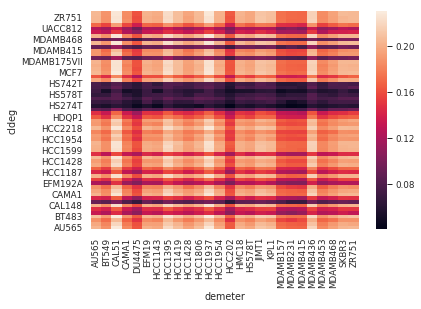

In [118]:
taub_piv = taub_obs_a.pivot('cldeg', 'demeter', 'tau_b')
ax = sns.heatmap(taub_piv)
ax.invert_yaxis()

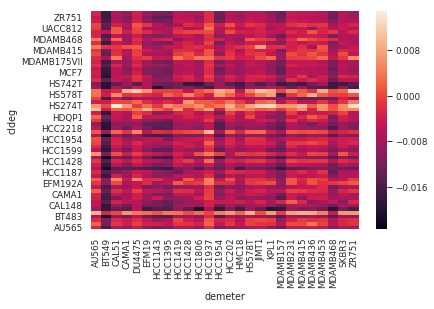

In [119]:
taub_piv = taub_null_a.pivot('cldeg', 'demeter', 'tau_b')
ax = sns.heatmap(taub_piv)
ax.invert_yaxis()

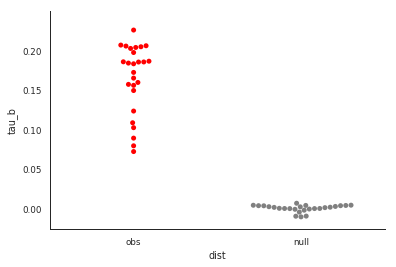

In [133]:
sns.swarmplot(data=taub_cat_a, x='dist', y='tau_b', palette=['red','gray'])
sns.despine()
plt.savefig('fig_ch4.3_ccle_demeter_taub_swarm.svg', format='svg')

In [213]:
obs = taub_cat_a[taub_cat_a['dist']=='obs']['tau_b'].values
nul = taub_cat_a[taub_cat_a['dist']=='null']['tau_b'].values

stats.ttest_ind(obs, nul)

Ttest_indResult(statistic=19.144330932746907, pvalue=1.1498880256234432e-24)

In [161]:
depmap = pd.read_table('data/depmap_binaryDepScores.tsv.zip', index_col=0)



for cell in depmap.columns.intersection(cldeg_ccle.columns):
    dep_ess = depmap[depmap==1][[cell]].dropna()
    dep_noness = depmap[depmap==0][[cell]].dropna()
    essen_idx = dep_ess.index.intersection(cldeg_ccle.index)
    noess_idx = dep_noness.index.intersection(cldeg_ccle.index)
    tt = stats.ttest_ind(cldeg_ccle.loc[essen_idx][cell],cldeg_ccle.loc[noess_idx][cell])
    print(cell, tt)
# cldeg_ccle.loc[essen_idx]

AU565 Ttest_indResult(statistic=27.203934068840692, pvalue=6.9783804362581223e-159)
HCC1143 Ttest_indResult(statistic=27.065427221538744, pvalue=2.4960107297077936e-157)
HCC1187 Ttest_indResult(statistic=18.972727816038741, pvalue=2.765457184272648e-79)
HCC1395 Ttest_indResult(statistic=21.412684530026365, pvalue=3.9418860768950494e-100)
HCC1937 Ttest_indResult(statistic=26.164616952163957, pvalue=2.1197953290769084e-147)
HCC1954 Ttest_indResult(statistic=21.504316575571988, pvalue=5.8467850149677596e-101)
HCC38 Ttest_indResult(statistic=25.039199038565691, pvalue=2.0082231541156702e-135)
HCC70 Ttest_indResult(statistic=19.138981766151804, pvalue=1.2493136715552325e-80)
MCF7 Ttest_indResult(statistic=26.649741083052461, pvalue=1.0392849509321973e-152)
T47D Ttest_indResult(statistic=18.22341788767536, pvalue=2.3243316725584911e-73)


In [188]:
depmap = pd.read_table('data/depmap_binaryDepScores.tsv.zip', index_col=0)
cat_lis = []
for cell in depmap.columns.intersection(cldeg_ccle.columns):
    dep_ess = depmap[depmap==1][[cell]].dropna()
    dep_noness = depmap[depmap==0][[cell]].dropna()
    essen_idx = dep_ess.index.intersection(cldeg_ccle.index)
    noess_idx = dep_noness.index.intersection(cldeg_ccle.index)
    
    essen_df = cldeg_ccle.loc[essen_idx][[cell]]
    essen_df.rename_axis({cell:'CLOvE VV'}, axis=1,inplace=True)
    essen_df['cell'] = cell
    essen_df = essen_df.merge(depmap[[cell]], right_index=True, left_index=True)
    essen_df.rename_axis({cell:'DepMap_call'}, axis=1,inplace=True)

    noess_df = cldeg_ccle.loc[noess_idx][[cell]]
    noess_df.rename_axis({cell:'CLOvE VV'}, axis=1,inplace=True)
    noess_df['cell'] = cell
    noess_df = noess_df.merge(depmap[[cell]], right_index=True, left_index=True)
    noess_df.rename_axis({cell:'DepMap_call'}, axis=1,inplace=True)
    
    cat_lis.append(essen_df)
    cat_lis.append(noess_df)
    
    tt = stats.ttest_ind(cldeg_ccle.loc[essen_idx][cell],cldeg_ccle.loc[noess_idx][cell])
    print(cell, tt)
    
vv_dep = pd.concat(cat_lis)
vv_dep['DepMap_call'] = vv_dep['DepMap_call'].replace({1:'essential',0:'non-essential'})

AU565 Ttest_indResult(statistic=27.203934068840692, pvalue=6.9783804362581223e-159)
HCC1143 Ttest_indResult(statistic=27.065427221538744, pvalue=2.4960107297077936e-157)
HCC1187 Ttest_indResult(statistic=18.972727816038741, pvalue=2.765457184272648e-79)
HCC1395 Ttest_indResult(statistic=21.412684530026365, pvalue=3.9418860768950494e-100)
HCC1937 Ttest_indResult(statistic=26.164616952163957, pvalue=2.1197953290769084e-147)
HCC1954 Ttest_indResult(statistic=21.504316575571988, pvalue=5.8467850149677596e-101)
HCC38 Ttest_indResult(statistic=25.039199038565691, pvalue=2.0082231541156702e-135)
HCC70 Ttest_indResult(statistic=19.138981766151804, pvalue=1.2493136715552325e-80)
MCF7 Ttest_indResult(statistic=26.649741083052461, pvalue=1.0392849509321973e-152)
T47D Ttest_indResult(statistic=18.22341788767536, pvalue=2.3243316725584911e-73)


In [193]:
vv_dep.to_csv('data/cldeg_vv_depmap.csv.gz', compression='gzip')

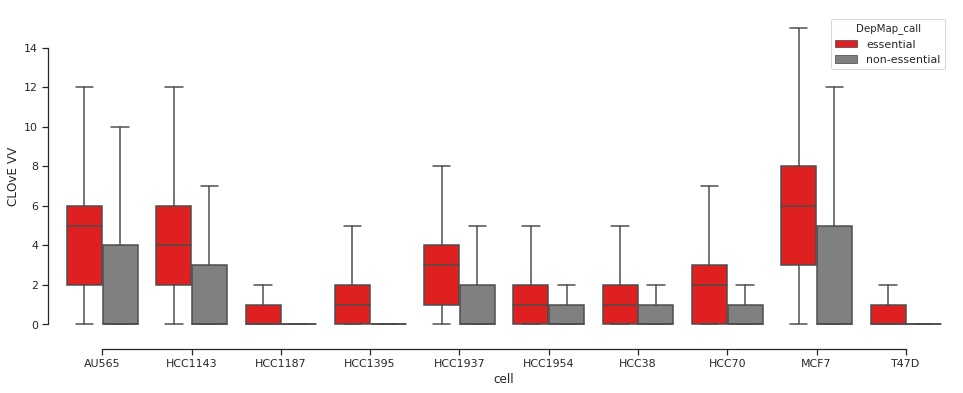

In [206]:
plt.figure(figsize=(16, 6))
sns.set(style="ticks")
sns.boxplot(data=vv_dep, x='cell',y='CLOvE VV', hue='DepMap_call',showfliers=False, palette=['red','gray'])
sns.despine(offset=10, trim=True)
plt.savefig('fig_ch4.3_cldeg_depmap_box.svg')

## Sanity check: DepMap vs Demeter
confirm that DepMap Essentiality calls have higher Demeter Essentiality scores (in agreement)

In [38]:
# load data
depmap = pd.read_table('data/depmap_binaryDepScores.tsv.zip', index_col=0)
demetr = pd.read_csv('data/breast_Achilles_gene_dependency.csv.gz', index_col=0)
ccle = pd.read_csv('data/breast_ttest_nonull_n2v8.tab.gz', sep='\t', index_col=0)
breastlines = pd.read_csv('data/breast_mrna.tab.gz', sep='\t', index_col=0).columns

In [39]:
# begin validating depmap calls and demeter
# do they correlate?
depvalid = depmap[list(set(depmap.columns).intersection(demetr.columns))] 
demvalid = demetr[list(set(depmap.columns).intersection(demetr.columns))] 
depnull = depvalid.sample(frac=1).set_index(depvalid.index, drop=True)

#get demeter scores that are depmap-essential
essential = demvalid[depvalid ==1].values.flatten() # dep-essential
essential = essential[~np.isnan(essential)]
nonessential= demvalid[depvalid ==0].dropna().values # dep-nonessential
nonessential = nonessential[~np.isnan(nonessential)]
null = demvalid[depnull ==1].values.flatten()  # dep-nullessential
null = null[~np.isnan(null)]

rownum = min(len(essential), len(nonessential))
essential=np.random.choice(essential, rownum)
nonessential=np.random.choice(nonessential, rownum)
null=np.random.choice(null, rownum)
print('essential vs nonessential', scipy.stats.ttest_ind(essential, nonessential))
print('essential vs nonessential', scipy.stats.ks_2samp(essential, nonessential))


depmap_demeter_df = pd.concat([pd.DataFrame({'score':null, 'depmap call': 'null'}),
           pd.DataFrame({'score':essential, 'depmap call': 'essential'}),
           pd.DataFrame({'score':nonessential, 'depmap call': 'nonessential'})])
                    
%matplotlib inline
sns.violinplot(x='depmap call', y='score', data=depmap_demeter_df, order=['essential','nonessential','null'])


NameError: name 'scipy' is not defined

In [ ]:
# begin validating depmap calls and demeter
# do they correlate?
depvalid = depmap[list(set(depmap.columns).intersection(demetr.columns))] 
demvalid = demetr[list(set(depmap.columns).intersection(demetr.columns))] 
depnull = depvalid.sample(frac=1).set_index(depvalid.index, drop=True)

#get demeter scores that are depmap-essential
essential = demvalid[depvalid ==1].values.flatten() # dep-essential
essential = essential[~np.isnan(essential)]
nonessential= demvalid[depvalid ==0].dropna().values # dep-nonessential
nonessential = nonessential[~np.isnan(nonessential)]
null = demvalid[depnull ==1].values.flatten()  # dep-nullessential
null = null[~np.isnan(null)]

rownum = min(len(essential), len(nonessential))
essential=np.random.choice(essential, rownum)
nonessential=np.random.choice(nonessential, rownum)
null=np.random.choice(null, rownum)
print('essential vs nonessential', stats.ttest_ind(essential, nonessential))
print('essential vs nonessential', stats.ks_2samp(essential, nonessential))


depmap_demeter_df = pd.concat([pd.DataFrame({'score':null, 'depmap call': 'null'}),
           pd.DataFrame({'score':essential, 'depmap call': 'essential'}),
           pd.DataFrame({'score':nonessential, 'depmap call': 'nonessential'})])
                    
%matplotlib inline
sns.violinplot(x='depmap call', y='score', data=depmap_demeter_df, order=['essential','nonessential','null'])
sns.despine()

## Get non-essential genes from DepMap
Any CLOvE pairs that have a prey gene included in a list of genes that are not essential (in any sample), are marked as being non-essential 

In [43]:
breastlines = pd.read_csv('data/breast_mrna.tab.gz', sep='\t', index_col=0).columns
depmap = pd.read_table('data/depmap_binaryDepScores.tsv.zip', index_col=0)
non_ess = depmap.loc[depmap.sum(axis=1)==0]

depvalid = depmap[list(set(depmap.columns).intersection(demetr.columns))] 

In [44]:
non_ess

,A2058,A2780cis,A2780ADR,A2780,A375,A549,AM-38,AU565,AsPC-1,BE2-M17,...,T84,TGW,TOV-112D,TOV-21G,TYK-nu,U251,UACC-893,UWB1.289,VMRC-LCD,YAPC
Gene,,,,,,,,,,,,,,,,,,,,,
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AADAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AADACL3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AADACL4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAED1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## synlethdb validation


In [41]:
syndb = pd.read_pickle('data/synlethdb_sl_human.pickle')

In [42]:
syndb

,GeneASymbol,GeneAid,GeneBSymbol,GeneBid,PubmedID,Evidence,Type,Species,DiseaseScore
19837,BRCA1,672,PARP1,142,15829967;3965078;20832020;23370117;23564760;24...,Synlethality;Decipher;Text Mining,SL,"Human breast cancer;A549,PC3,MDA468;breast can...",0.990
19950,RB1,5925,SKP2,6502,20505340,Synlethality,SL,Human cancer,0.900
19949,PRKAA1,5562,TP53,7157,17638885,Synlethality,SL,Human colorectal cancer,0.900
19948,BIRC5,332,HRAS,3265,12833149,Synlethality,SL,Human cancer,0.900
19947,MTOR,2475,PTEN,5728,11504908,Synlethality,SL,Human cancer,0.900
19946,MAP4,4134,TP53,7157,10446979,Synlethality,SL,"Human prostate cancer, human ovarian carcinoma",0.900
19945,ATR,545,MYC,4609,22120667,Synlethality,SDL,Human lymphomas or pancreatic tumors,0.900
19951,EGFR,1956,NOTCH1,4851,20570903,Synlethality,SDL,Human Basal-like breast cancers (BLBC),0.900
19835,BRCA1,672,PARP2,10038,21487248;3965078,Synlethality;Decipher,SL,"Human cancer;A549,PC3,MDA468",0.873
19938,PARP2,10038,STAG3,10734,23333522,Synlethality,SL,Human cancer,0.855
